<a href="https://colab.research.google.com/github/waliapriya/Codsoft/blob/main/TASK_1_MOVIE_GENRE_CLASSIFICATION_CODSOFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TASK 1 - MOVIE GENRE CLASSIFICATION CODSOFT

#### Objective
- The objective is to create a machine learning models that can predict the genre of a movie based on its plot summary or other textual information.

#### Import the required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#### Load & Read the dataset

In [2]:
df_train = pd.read_csv("train_data.txt", sep=':::', names=['ID','Title', 'Genre', 'Description'])
df_train.head()

<ipython-input-2-c096db9a38f1>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train = pd.read_csv("train_data.txt", sep=':::', names=['ID','Title', 'Genre', 'Description'])


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
df_test = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID','Title','Genre', 'Description'])
df_test.head()

<ipython-input-3-a5ce5f8cff96>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID','Title','Genre', 'Description'])


,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


#### Basic info

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1603 non-null   int64 
 1   Title        1603 non-null   object
 2   Genre        1603 non-null   object
 3   Description  1603 non-null   object
dtypes: int64(1), object(3)
memory usage: 50.2+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1587 non-null   int64 
 1   Title        1587 non-null   object
 2   Genre        1587 non-null   object
 3   Description  1587 non-null   object
dtypes: int64(1), object(3)
memory usage: 49.7+ KB


In [6]:
print(df_train.shape, df_test.shape)

(1603, 4) (1587, 4)


In [7]:
df_train.isnull().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [8]:
df_test.isnull().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

- No null values are present in both datasets

#### Concatenating both datasets

In [9]:
df = pd.concat([df_train, df_test], axis=0)

In [10]:
df.shape

(3190, 4)

In [11]:
df.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['Title'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *['Genre'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['Description'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_5, *['Title', 'Genre'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_6, *['Genre', 'Description'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_7, *['ID', 'Title'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_8, *['ID', 'Genre'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_9, *['ID', 'Description'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['ID', 'count()', 'Title'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['ID', 'count()', 'Genre'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['ID', 'count()', 'Description'], **{})
chart

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 1586
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           3190 non-null   int64 
 1   Title        3190 non-null   object
 2   Genre        3190 non-null   object
 3   Description  3190 non-null   object
dtypes: int64(1), object(3)
memory usage: 124.6+ KB


#### Text Preprocessing

In [13]:
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def cleantext(text):
    text= text.lower()
    text= re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
    text= re.sub(r"http\S+", "",text)
    text= re.sub(r"http", "",text)
    punctuations= '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text= text.replace(p, '')
    text= [word.lower() for word in text.split() if word.lower() not in sw]
    text= [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)
    emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"u"\U00002702-\U000027B0"u"\U000024C2-\U0001F251""]+", flags=re.UNICODE)
    text= emoji_pattern.sub(r'',text)
    return text

In [14]:
df['Description'] = df['Description'].apply(lambda x: cleantext(x))
df.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,"listening conversation doctor parents, year ol..."
1,2,Cupid (1997),thriller,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,"help unemployed father make end meet, edith tw..."
4,5,The Unrecovered (2007),drama,film title refers un recovered body ground zer...


#### Label Encoder for Genre variable

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['encoded_genre'] = label_encoder.fit_transform(df['Genre'])
df['encoded_genre']

0        8
1       24
2        1
3        8
4        8
        ..
1582    26
1583     8
1584    21
1585     3
1586     7
Name: encoded_genre, Length: 3190, dtype: int64

In [16]:
genre_names= list(label_encoder.classes_)
genre_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

#### Split the data into x & y & Train & Test data

In [17]:
x= df['Description']
y= df['encoded_genre']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 26)

#### Feature extraction using TF- IDF
- Feature extraction refers to the process of transforming raw data into numerical features that can be processed while preserving the information in the original data set.
#### TF- IDF
- TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_train1 = tfidf.fit_transform(x_train)
x_test1 =  tfidf.transform(x_test)

#### Dimension check

In [19]:
print("n_samples: %d, n_features: %d" % x_train1.shape)
print()
print("n_samples: %d, n_features: %d" % x_test1.shape)

n_samples: 2552, n_features: 22672

n_samples: 638, n_features: 22672


#### Model building

#### Model No 1 - Logistic Regression

In [20]:
# Model building
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
log=logit.fit(x_train1, y_train)
# Predict
y_pred_train_log = logit.predict(x_train1)
y_pred_test_log = logit.predict(x_test1)
# Evaluate
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
accuracy_log_test=accuracy_score(y_test,y_pred_test_log)
accuracy_log_train=accuracy_score(y_train,y_pred_train_log)
print('Logistic regression Train accuracy:', accuracy_score(y_train, y_pred_train_log))
print('------'*10)
print('Logistic regression Test accuracy:', accuracy_score(y_test, y_pred_test_log))

Logistic regression Train accuracy: 0.637539184952978
------------------------------------------------------------
Logistic regression Test accuracy: 0.45454545454545453


#### Confusion Matrix

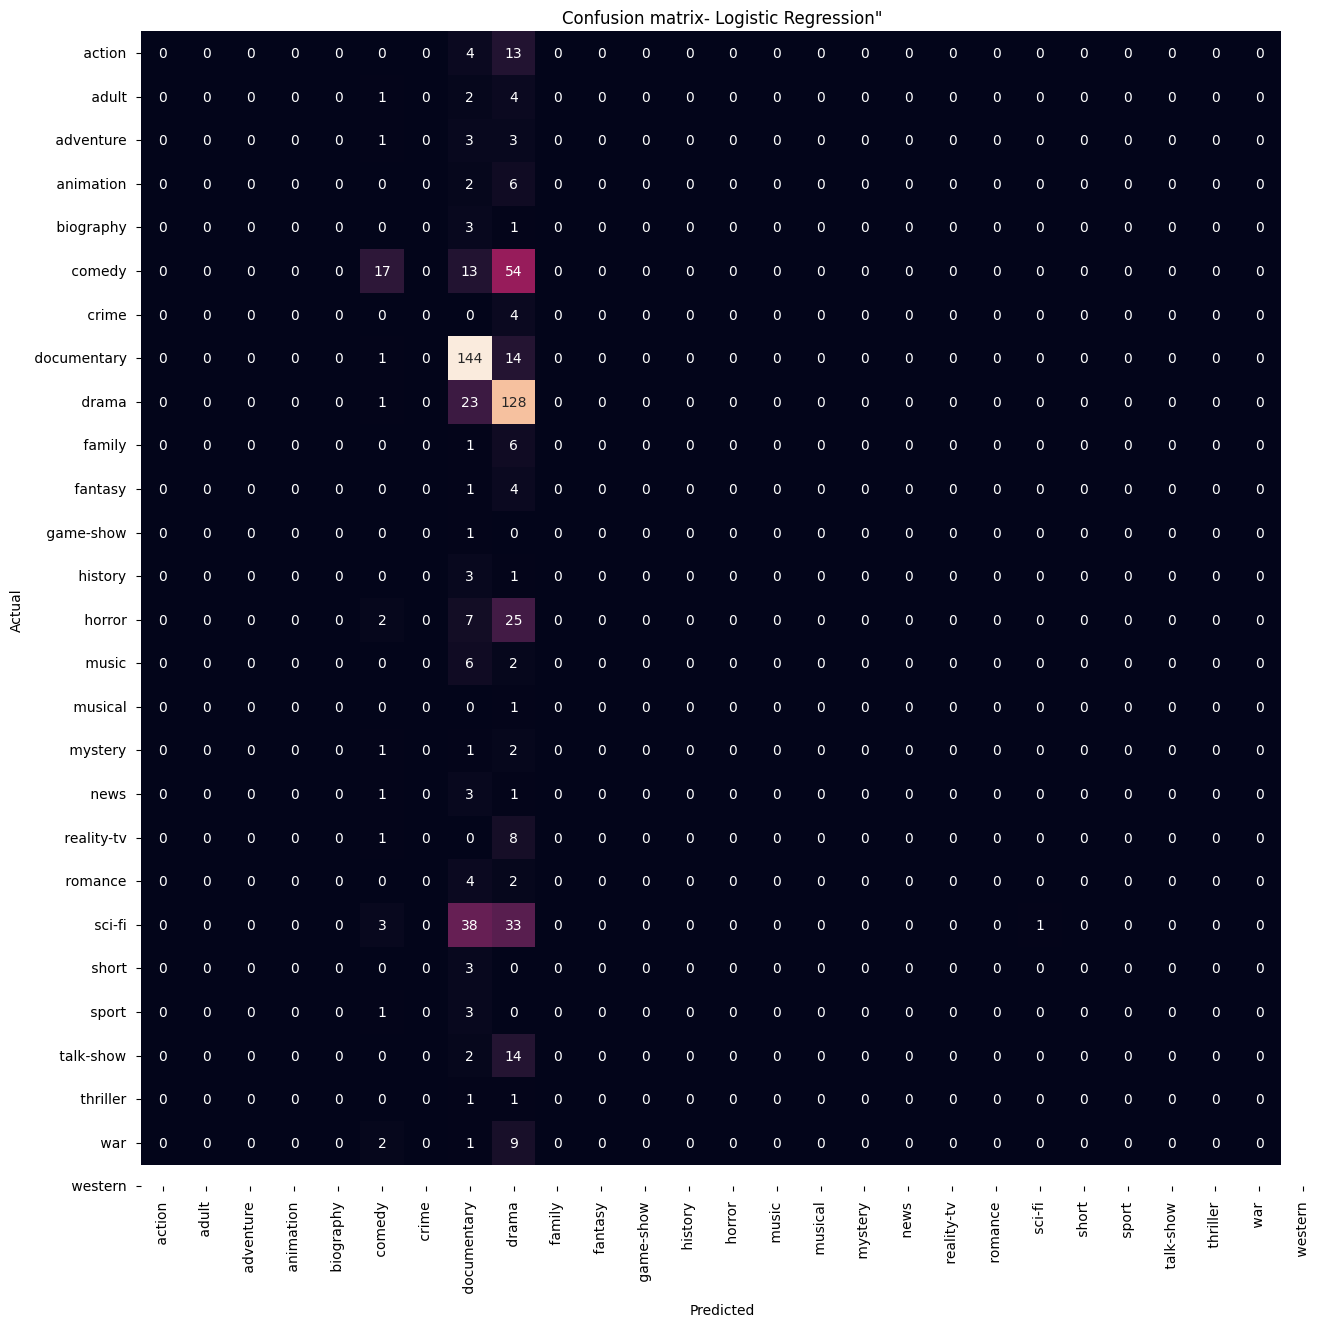

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(confusion_matrix(y_test, y_pred_test_log), annot=True, fmt='d', cbar=False,
            xticklabels=genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix- Logistic Regression"')
plt.show()

#### Model No . 2 - Random Forest Classifier

In [22]:
# Model building
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,oob_score=False)
rf.fit(x_train1,y_train)
# Predict
y_pred_train_rf=rf.predict(x_train1)
y_pred_test_rf=rf.predict(x_test1)
# Evaluate
accuracy_rf_test=accuracy_score(y_test,y_pred_test_rf)
accuracy_rf_train=accuracy_score(y_train,y_pred_train_rf)
print('Random Forest - Train accuracy:', accuracy_score(y_train, y_pred_train_rf))
print('-------'*10)
print('Random Forest - Test accuracy:', accuracy_score(y_test, y_pred_test_rf))

Random Forest - Train accuracy: 1.0
----------------------------------------------------------------------
Random Forest - Test accuracy: 0.438871473354232


#### Confusion Matrix

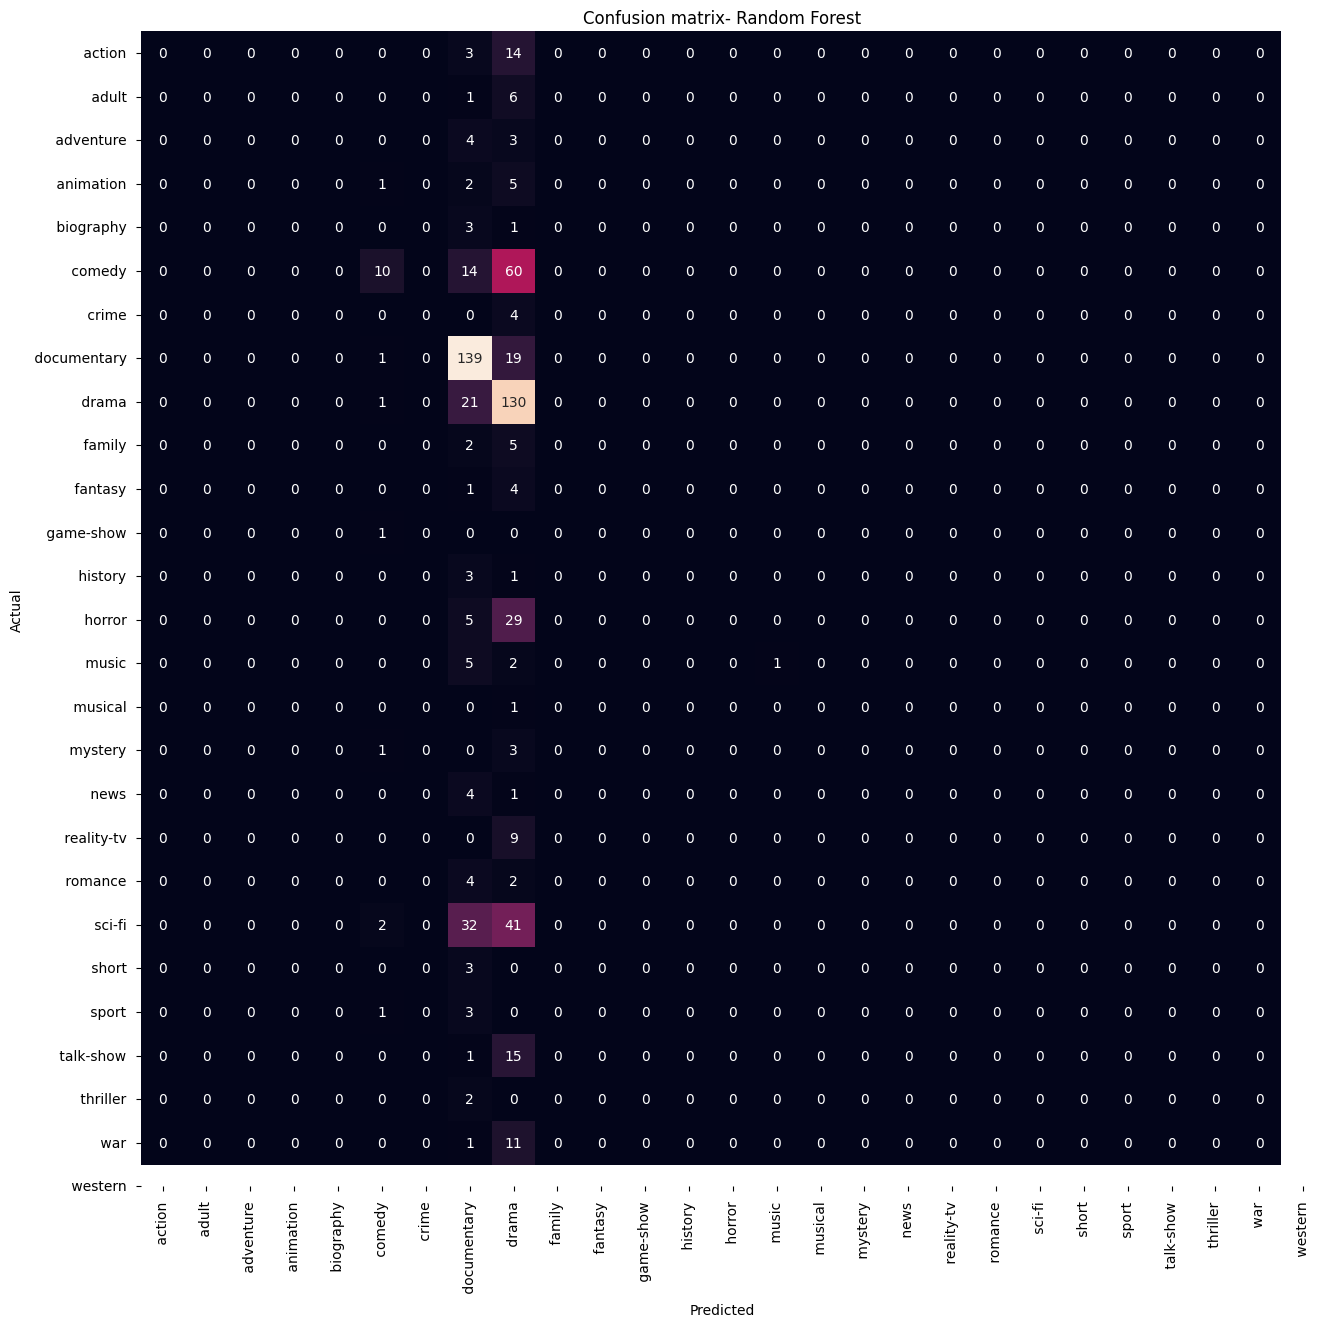

In [23]:
plt.figure(figsize=(15, 15))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rf), annot=True, fmt='d', cbar=False,
            xticklabels=genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix- Random Forest')
plt.show()

#### Model No 3- Multinomial Naive Bayes

In [24]:
# Model building
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train1, y_train)
# Predict the model
y_pred_train_mnb = mnb.predict(x_train1)
y_pred_test_mnb = mnb.predict(x_test1)
# Evaluate
accuracy_mnb_test=accuracy_score(y_test,y_pred_test_mnb)
accuracy_mnb_train=accuracy_score(y_train,y_pred_train_mnb)
print('Multinomial Naive Bayes -Train accuracy:', accuracy_score(y_train, y_pred_train_mnb))
print('-------'*10)
print('Multinomial Naive Bayes -Test accuracy:', accuracy_score(y_test, y_pred_test_mnb))

Multinomial Naive Bayes -Train accuracy: 0.4890282131661442
----------------------------------------------------------------------
Multinomial Naive Bayes -Test accuracy: 0.42476489028213166


#### Confusion Matrix

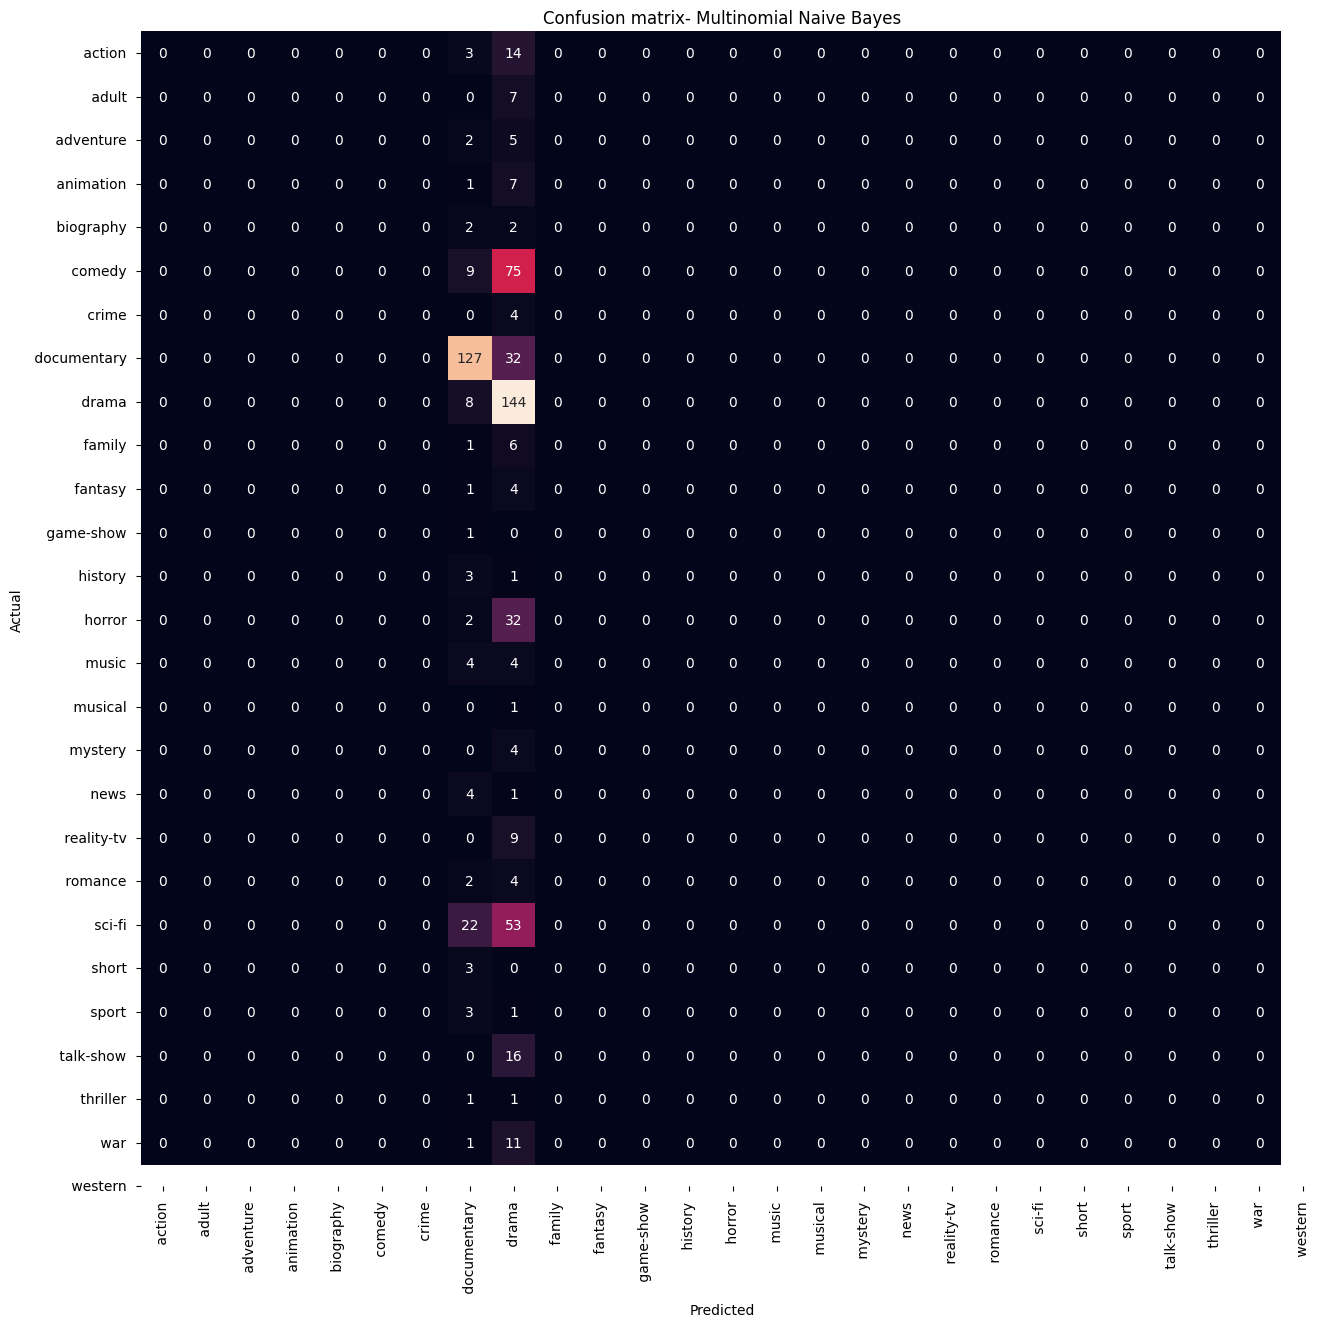

In [25]:
plt.figure(figsize=(15, 15))
sns.heatmap(confusion_matrix(y_test, y_pred_test_mnb), annot=True, fmt='d', cbar=False,
            xticklabels=genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix- Multinomial Naive Bayes')
plt.show()

#### Model No . 4 - Support Vector Machine

In [26]:
# Radial Basis Function Kernel (RBF) - (Defaut SVM) Model building
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train1, y_train)
#Predict
y_pred_train_rbf = svm_rbf.predict(x_train1)
y_pred_test_rbf = svm_rbf.predict(x_test1)
#Evaluate
accuracy_rbf_test=accuracy_score(y_test,y_pred_test_rbf)
accuracy_rbf_train=accuracy_score(y_train,y_pred_train_rbf)
print('Rbf - SVM - Train accuracy:', accuracy_score(y_train, y_pred_train_rbf))
print('-------'*10)
print('Rbf - SVM - Test accuracy:', accuracy_score(y_test, y_pred_test_rbf))

Rbf - SVM - Train accuracy: 0.8514890282131662
----------------------------------------------------------------------
Rbf - SVM - Test accuracy: 0.44357366771159873


#### Confusion Matrix

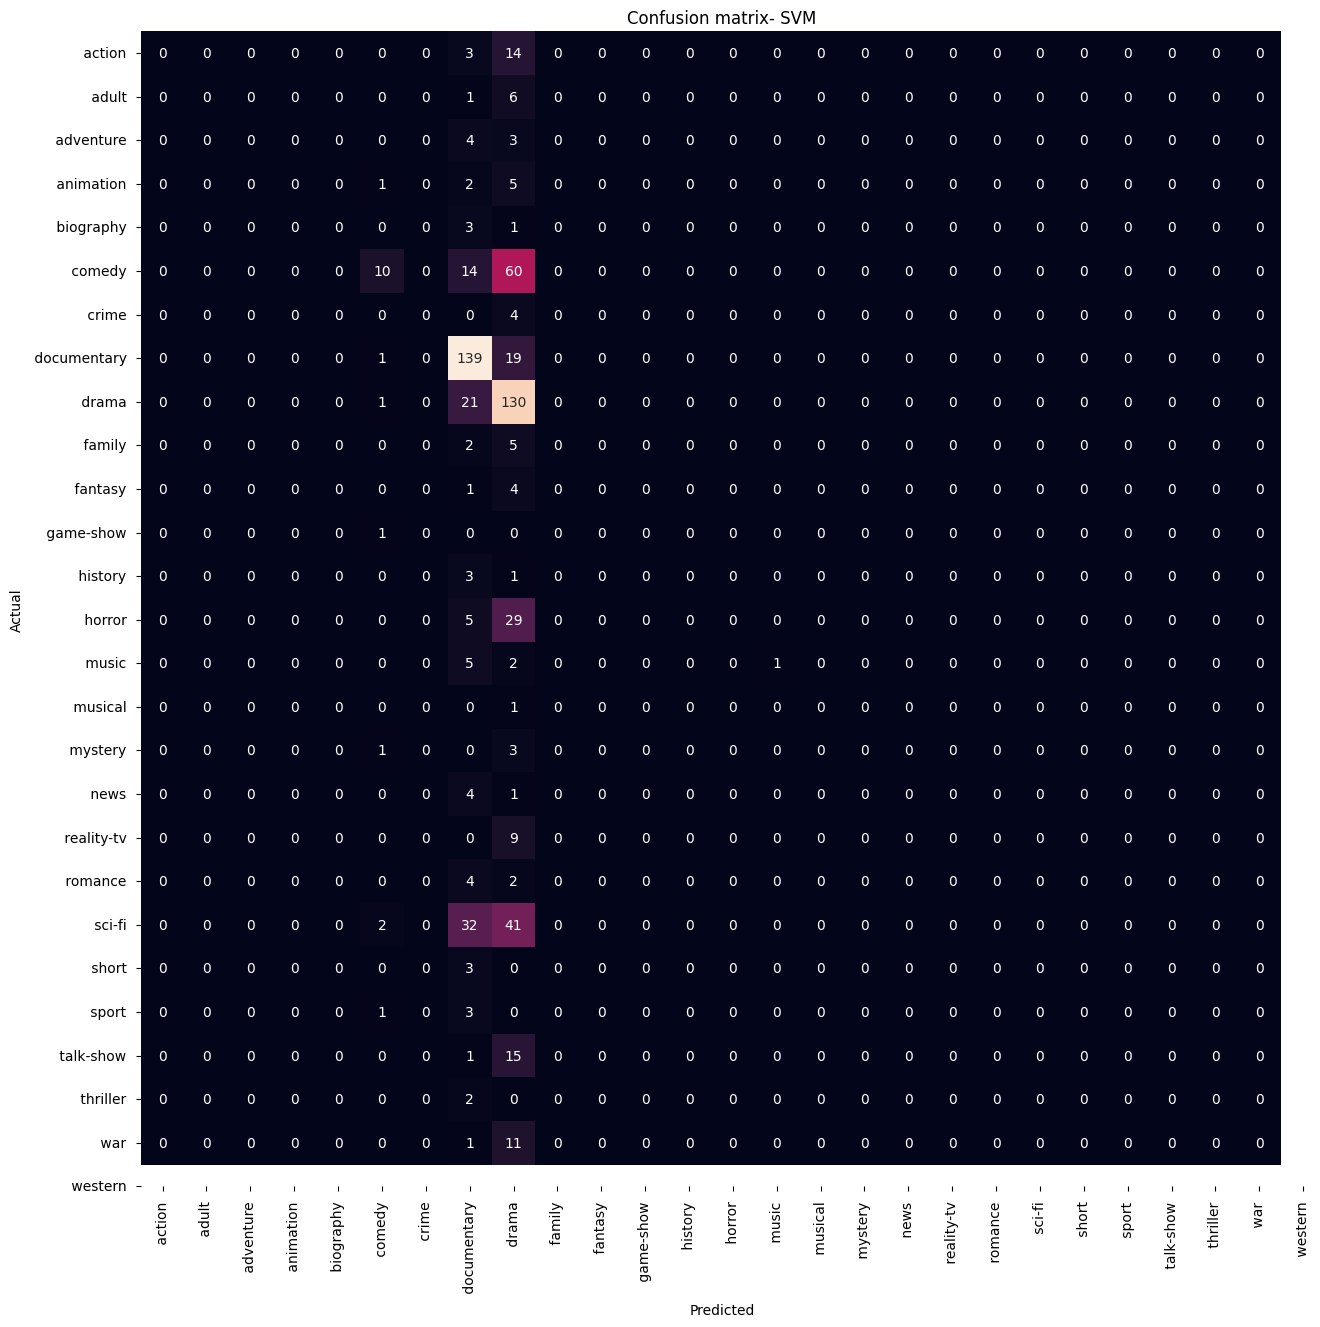

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rf), annot=True, fmt='d', cbar=False,
            xticklabels=genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix- SVM')
plt.show()

#### Combining all models in Tabular form

In [28]:
Models=['Logistic','Random_forest','MultinomialNB','SVM',]
Testacc=[accuracy_log_test,accuracy_rf_test,accuracy_mnb_test,accuracy_rbf_test]

In [29]:
Combined_accuracy=pd.DataFrame({'ModelName':Models,'TestAccuracy':Testacc})
print(Combined_accuracy)

       ModelName  TestAccuracy
0       Logistic      0.454545
1  Random_forest      0.438871
2  MultinomialNB      0.424765
3            SVM      0.443574


#### Accuracy Visualization

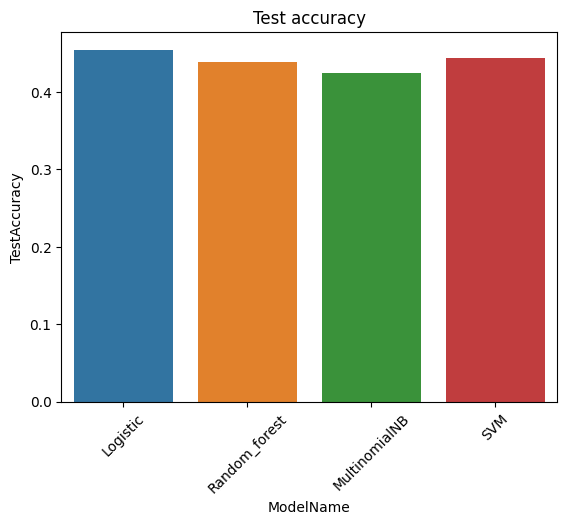

In [30]:
sns.barplot(x='ModelName',y='TestAccuracy',data=Combined_accuracy)
plt.xticks(rotation=45)
plt.title('Test accuracy')
plt.show()

#### Conclusion
- I tried to work upon Movie Genre Classification dataset having two datasets of 7935 & 9623 rows each with 4 columns.
- The objective is to create a machine learning models that can predict the genre of a movie based on its plot summary or other textual information.
- For this I used Supervised machine learning classification models of Logistic Regression, Multinomial Naive Bayes, Random Forest & Support Vector Machine.
- Text preprocessing was done as the first step of both the approaches.
- I used TF- IDF for feature extraction
- All the models gave poor accuracy between 42 - 45%.